In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import pandas as pd
import numpy as np

In [2]:
path_imstack = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\cell_density_validation\im_stack_2_5_new_vol_v3.pkl'

with open(path_imstack, 'rb') as file:
    im_stack = pickle.load(file)

In [3]:
im_stack = [im for i,im in enumerate(im_stack) if i != 711]

In [4]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

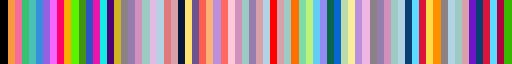

In [5]:
from matplotlib.colors import ListedColormap

cmap_pth = r"\\10.99.68.178\andreex\students\Donald Monkey fetus\codes\monkey\new_cmap_10_16.mat"
cmap_var = load_var_from_mat(cmap_pth, "cmap")
noise_color = np.array([0, 0, 0]).reshape(1,3)
cmap_var = np.concatenate([noise_color, cmap_var], axis=0)/255
#cmap_var = cmap_var/255

cmap_var = ListedColormap(cmap_var)
cmap_var

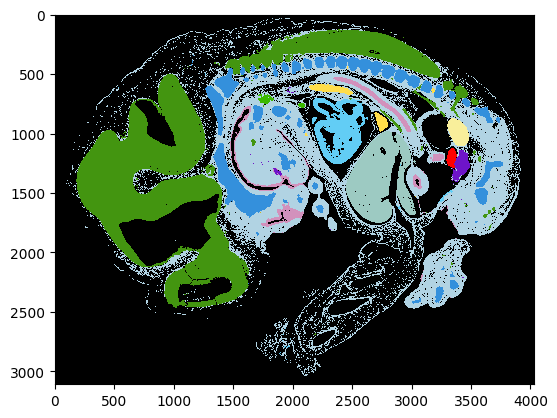

In [6]:
i = 500

im = im_stack[i]

plt.imshow(im, cmap=cmap_var, interpolation='none')
plt.show()

In [7]:
old_labels = []
for j,im in enumerate(im_stack):
    print(j)
    unique = np.unique(im)
    for val in unique:
        if val not in old_labels:
            old_labels.append(val)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
old_labels = sorted(old_labels)
print(len(old_labels))

92


In [9]:
new_labels = range(0,len(old_labels))

label_mapping = {old_label: new_label for old_label, new_label in zip(old_labels, new_labels)}

In [10]:
label_mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 15: 7,
 17: 8,
 18: 9,
 101: 10,
 102: 11,
 103: 12,
 104: 13,
 105: 14,
 106: 15,
 107: 16,
 201: 17,
 202: 18,
 203: 19,
 204: 20,
 205: 21,
 206: 22,
 207: 23,
 208: 24,
 209: 25,
 210: 26,
 211: 27,
 212: 28,
 301: 29,
 302: 30,
 303: 31,
 304: 32,
 305: 33,
 401: 34,
 402: 35,
 403: 36,
 404: 37,
 405: 38,
 406: 39,
 501: 40,
 502: 41,
 503: 42,
 504: 43,
 505: 44,
 506: 45,
 507: 46,
 508: 47,
 509: 48,
 510: 49,
 601: 50,
 602: 51,
 603: 52,
 604: 53,
 605: 54,
 606: 55,
 607: 56,
 701: 57,
 702: 58,
 703: 59,
 801: 60,
 802: 61,
 803: 62,
 804: 63,
 805: 64,
 806: 65,
 807: 66,
 901: 67,
 902: 68,
 903: 69,
 904: 70,
 905: 71,
 1001: 72,
 1002: 73,
 1003: 74,
 1004: 75,
 1005: 76,
 1101: 77,
 1102: 78,
 1103: 79,
 1104: 80,
 1201: 81,
 1202: 82,
 1203: 83,
 1204: 84,
 1205: 85,
 1206: 86,
 1207: 87,
 1301: 88,
 1302: 89,
 1303: 90,
 1304: 91}

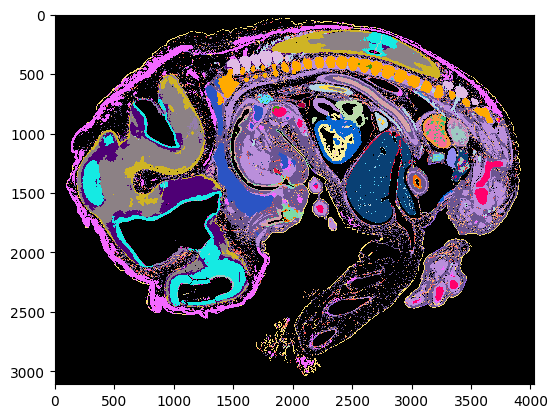

In [11]:
i = 500

im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(new_im, cmap=cmap_var, interpolation='none')
plt.show()

Load pickled files

In [18]:
skipped = [193]

pickled_features_path = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles'
features_list = os.listdir(pickled_features_path)
features_list = sorted([os.path.join(pickled_features_path,f) for k,f in enumerate(features_list) if f.endswith('.pkl') and k not in skipped])

In [19]:
pth_crop_info_dir = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\2_5x\cropped_images\bounding_boxes'
crop_mat_list = sorted(os.listdir(pth_crop_info_dir))
crop_mat_list = [file for k, file in enumerate(crop_mat_list) if 'monkey' in file and "0726" not in file and k not in skipped]

crop_data = []

for i, file in enumerate(sorted(crop_mat_list)):
    mat_file_name = os.path.join(pth_crop_info_dir, file)
    try:
        data = loadmat(mat_file_name)

        #print('scipy.io loadmat')
        bb = [int(x) for x in data['bb']]
        crop_data.append(bb)
        #print(bb)

    except:
        data = h5py.File(mat_file_name, 'r')

        #print('h5py')
        bb = [int(x) for x in data['bb'][()]]
        crop_data.append(bb)
        #print(bb)

In [20]:
pth_pixel_res = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info'
pixel_res_info = sorted(os.listdir(pth_pixel_res))
pixel_res_files = [os.path.join(pth_pixel_res,file) for file in pixel_res_info if file.endswith('.mat')]
pixel_res_files_fixed = [j for i, j in enumerate(pixel_res_files) if "0726" not in j and i not in skipped]

In [21]:
print(len(pixel_res_files_fixed))
print(len(features_list))
print(len(crop_mat_list))

1152
1152
1152


In [22]:
for i,j,k in zip(features_list, pixel_res_files_fixed, crop_mat_list):
    print(i)
    print(j)
    print(k)
    print()

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0001.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0001.mat
monkey_fetus_40_0001.mat

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0002.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0002.mat
monkey_fetus_40_0002.mat

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0003.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0003.mat
monkey_fetus_40_0003.mat

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0004.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\se

In [37]:
i = 500

crop_data[i]

[1, 4028, 1, 3109]

In [38]:
print(pixel_res_files_fixed[i])
print(crop_mat_list[i])
print(features_list[i])

\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0503.mat
monkey_fetus_40_0503.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0503.pkl


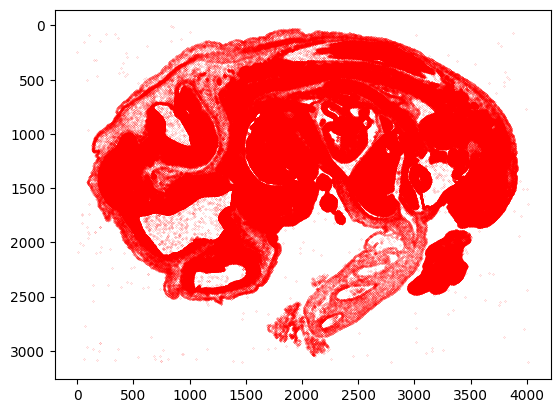

In [39]:
with open(features_list[i], 'rb') as file:
    features = pickle.load(file)

pix_res = float(load_var_from_mat(pixel_res_files_fixed[i], 'pix_res')[0][0][0])
downsize2_5x = 4/pix_res
downsize5x = 2/pix_res

crop_d = [num for num in crop_data[i]]
# I think this part is an artifact from andre's cropping method in matlab, sometimes they were out of order
if crop_d[1] > crop_d[2]:
    temp = crop_d[2]
    crop_d[2] = crop_d[1]
    crop_d[1] = temp

crop_file_data = [(num-1)*downsize2_5x for num in crop_d]
x_offset = crop_file_data[1]
y_offset = crop_file_data[0]

x = features['Centroid_x']
y = features['Centroid_y']

inds = x.index.tolist()  # save ids

x = (features['Centroid_x'] - y_offset) /downsize2_5x
y = (features['Centroid_y'] - x_offset) /downsize2_5x

xy_1 = list(zip(x, y))

xy_filtered_with_indices = [(index, [x, y]) for index, (x, y) in enumerate(xy_1) if 0 <= x < crop_d[2] and 0 <= y < crop_d[3]]

inds = [index for index, _ in xy_filtered_with_indices]
xy = np.array([coordinates for _, coordinates in xy_filtered_with_indices])


plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
plt.gca().invert_yaxis()
plt.show()

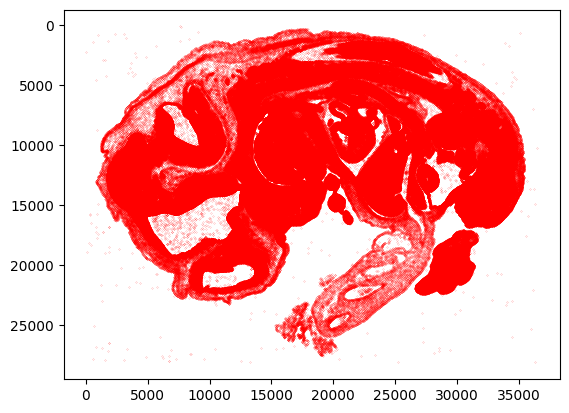

In [40]:
plt.scatter(features['Centroid_x'], features['Centroid_y'], c='r', s=0.01)
plt.gca().invert_yaxis()
plt.show()

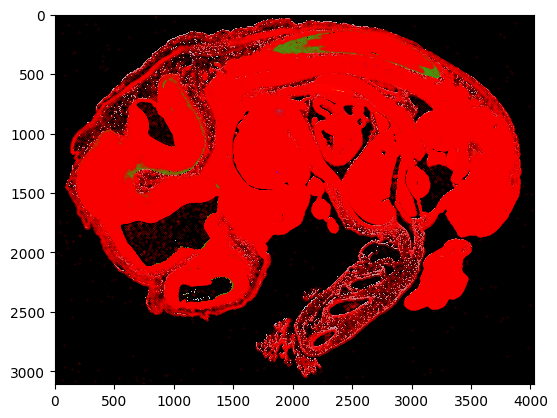

In [41]:
im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(im, cmap=cmap_var, interpolation='none')

plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
#plt.gca().invert_yaxis()

plt.show()

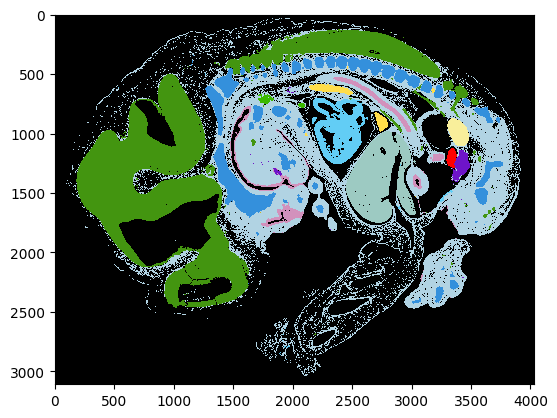

In [42]:
plt.imshow(im, cmap=cmap_var, interpolation='none')

In [43]:
from scipy.io import savemat

In [44]:
crop_data[i]

[1, 4028, 1, 3109]

In [45]:
i

500

In [31]:
for i in range(len(features_list)):
    with open(features_list[i], 'rb') as file:
        features = pickle.load(file)
    
    pix_res = float(load_var_from_mat(pixel_res_files_fixed[i], 'pix_res')[0][0][0])
    downsize2_5x = 4/pix_res
    downsize5x = 2/pix_res
    
    crop_d = [num for num in crop_data[i]]
    # I think this part is an artifact from andre's cropping method in matlab, sometimes they were out of order
    if crop_data[0] == 1 and crop_data[2] == 1:
        continue
    else:
        if crop_d[1] > crop_d[2]:
            temp = crop_d[2]
            crop_d[2] = crop_d[1]
            crop_d[1] = temp
    if crop_d[3] - crop_d[1] < 1500 or crop_d[2] - crop_d[0] < 1500:
        crop_d = [crop_d[0],crop_d[1],crop_d[0]+crop_d[2],crop_d[1]+crop_d[3]]
    
    
    
    crop_file_data = [(num-1)*downsize2_5x for num in crop_d]
    x_offset = crop_file_data[1]
    y_offset = crop_file_data[0]
    
    x = features['Centroid_x']
    y = features['Centroid_y']
    
    inds = x.index.tolist()  # save ids
    
    x = (features['Centroid_x'] - y_offset) /downsize2_5x
    y = (features['Centroid_y'] - x_offset) /downsize2_5x
    
    xy_1 = list(zip(x, y))
    
    xy_filtered_with_indices = [(index, [x, y]) for index, (x, y) in enumerate(xy_1) if 0 <= x < (crop_d[2] - crop_d[0]) and 0 <= y < (crop_d[3] - crop_d[1])]
    
    inds = [index for index, _ in xy_filtered_with_indices]
    xy = np.array([coordinates for _, coordinates in xy_filtered_with_indices])
    
    
    
    # save adj pickle xy coords and inds of df
    num = features_list[i].split('\\')[-1][-8:-4]
    outfile = fr'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_{num}.mat'
    print(outfile)
    print(crop_d)
    savemat(outfile, {'xy': xy, 'inds': inds})
    
    
    # plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
    # plt.gca().invert_yaxis()
    # plt.show()

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0001.mat
[2279, 2910, 5816, 5498]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0002.mat
[1112, 1049, 4923, 3148]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0003.mat
[1054, 1241, 4932, 3645]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0004.mat
[553, 554, 4484, 2751]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0005.mat
[2559, 2861, 6406, 5630]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0006.mat
[2032, 2997, 5944, 5569]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_a

In [32]:
crop_d

[116, 205, 1388, 1449]

In [33]:
max(xy[:,0])

966.5

In [34]:
total = 0
for key in np.unique(new_im):
    num = len(np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == key]))
    print(key, num)
    total += num
print(total)

0 870
7 0
8 0
9 0
10 0
11 0
13 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
26 0
27 0
28 0
31 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
60 0
61 0
62 0
65 0
66 0
72 0
73 0
74 0
75 0
80 0
82 0
84 0
85 0
86 0
87 0
88 0
89 0
91 0
870


In [48]:
len(xy_class_w_ind)

110691

In [ ]:
len()

C:\Users\Donald\AppData\Local\Temp\ipykernel_40004\3604808688.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])


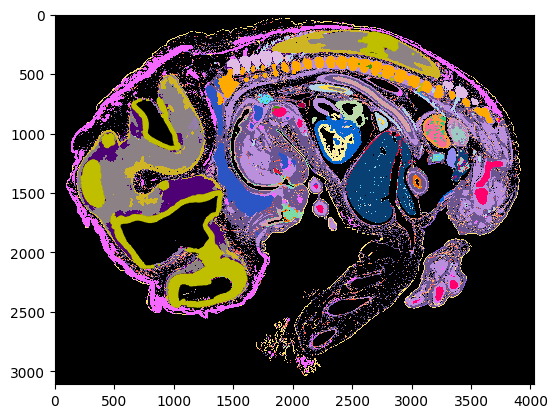

In [46]:
im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(new_im, cmap=cmap_var, interpolation='none')

lab = 18

#xy_class = np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == lab])
xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])

inds_class = [index for index, _ in xy_class_w_ind]
xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])

plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
#plt.gca().invert_yaxis()

plt.show()

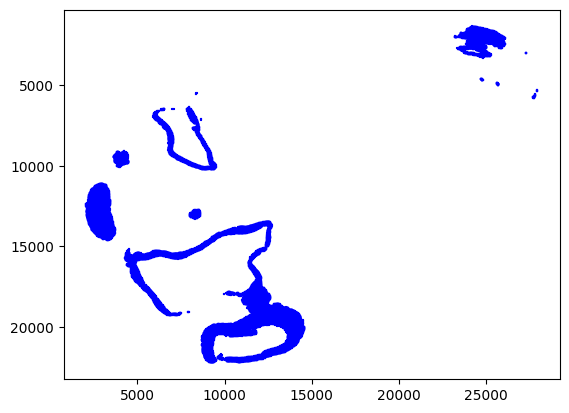

In [47]:
test = features.iloc[inds_class]
plt.scatter(test['Centroid_x'], test['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
features.iloc[inds_class]

In [ ]:
def get_class_inds(label, xy, inds, new_im):
    xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])
    
    inds_class = [index for index, _ in xy_class_w_ind]
    xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])
    
    return inds_class, xy_class

In [ ]:
inds_18, xy_18 = get_class_inds(18, xy, inds, new_im)
df_18 = features.iloc[inds_18]
plt.scatter(df_18['Centroid_x'], df_18['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
inds_20, xy_20 = get_class_inds(20, xy, inds, new_im)
df_20 = features.iloc[inds_20]
plt.scatter(df_20['Centroid_x'], df_20['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()

plt.show()

In [ ]:
plt.imshow(new_im, cmap=cmap_var, interpolation='none')
plt.show()

In [ ]:
ventricular = df_18.drop(columns=['Centroid_x', 'Centroid_y'])
ventricular.dropna(inplace=True)
subventricular = df_20.drop(columns=['Centroid_x', 'Centroid_y'])
subventricular.dropna(inplace=True)

In [ ]:
ventricular.head()

In [ ]:
subventricular.head()

In [ ]:
print(subventricular.columns.tolist())

In [ ]:
plt.figure(figsize=(8, 5))

feature = 'Area'

plt.hist(ventricular[feature], bins=20, color='skyblue', label='Ventricular', edgecolor='black')
plt.hist(subventricular[feature], bins=20, color='salmon', alpha=0.5, label='Subventricular', edgecolor='black')

plt.title(f'Distribution of {feature}')
plt.xlabel(f'{feature}')
plt.ylabel('Frequency')
plt.legend()  
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(ventricular['Area'],ventricular['b_mean_intensity'], label='Ventricular', s=0.1)
plt.scatter(subventricular['Area'],subventricular['b_mean_intensity'], label='Subventricular', s=0.1, c='r')
# plt.legend()  
plt.xlabel(f'Area')
plt.ylabel('Mean Blue Intensity')

In [ ]:
inds_18, xy_18 = get_class_inds(18, xy, inds, new_im)
df_18 = features.iloc[inds_18]

In [ ]:
for lab in new_labels:
    print(lab)

In [ ]:
df_label_dict = {}  # only with stuff

for key in np.unique(new_im):
    num = len(np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == key]))
    inds_key, xy_key = get_class_inds(key, xy, inds, new_im)
    df_key = features.iloc[inds_key]
    print(key, num)
    
    # plt.scatter(df_key['Centroid_x'], df_key['Centroid_y'], c='b', marker='+', s=1)
    # plt.gca().invert_yaxis()
    # plt.show()
    
    df_label_dict[key] = df_key

In [ ]:
df_label_dict_1000 = {}  #filter dict such that only classes with over 1000 cells remain
for key, value in df_label_dict.items():
    if len(value) > 1000:
        cls = classes[key]
        print(cls)
        df_label_dict_1000[cls] = value

In [ ]:
print(len(df_label_dict_1000))
print(len(df_label_dict))

In [ ]:
valid_keys

In [ ]:
valid_keys = list(df_label_dict_1000.keys())
key1 = 'bone_Limbs'
key2 = 'bone_Ribs'
test1 = df_label_dict_1000[key1]
test2 = df_label_dict_1000[key2]

plt.scatter(test1['Area'],test1['g_mean_intensity'], label=key1, s=0.5)
plt.scatter(test2['Area'],test2['g_mean_intensity'], label=key2, s=0.5, c='r')
plt.legend(markerscale=10)  
plt.xlabel(f'Area')
plt.ylabel('Mean Blue Intensity')

In [ ]:
plt.scatter(test1['Centroid_x'], test1['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()

plt.show()

In [ ]:
noise = ['noise_Noise']  # 0 
adrenal = ['adrenal_Stroma', 'adrenal_Cortex', 'adrenal_FetalZone', 'adrenal_Endothelial', 'adrenal_Cells',
           'adrenal_Noise']  # 1, 2, 3, 4, 5, 6
thymus = ['thymus_Thymus']  # 15
bladder = [
    'bladder_bladder']  # 16  # WRONG, should be bladder = ['Bladder'], there is no bladder in this first try, i messed up
skull = ['skull_skull']

bone = ['bone_ECM', 'bone_Limbs', 'bone_Spine', 'bone_Ribs', 'bone_Notochord', 'bone_Hyoid',
        'bone_Pharyngeal']  # 101, 102, 103, 104, 105, 106, 107
brain = ['brain_Non_tissue', 'brain_Ventricular', 'brain_Stroma', 'brain_Subventricular', 'brain_Marginal_Layer',
         'brain_Intermediate', 'brain_Cortical_Plate', 'brain_Choroid_Plexus', 'brain_Pituitary', 'brain_Neural_Canal',
         'brain_Ganglion', 'brain_Nerve']  # 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212
ear = ['ear_Cochlea', 'ear_Nontissue', 'ear_Nerve', 'ear_Semicircular_Canals',
       'ear_Cochlear_Ducts']  # 301, 302, 303, 304, 305
ecm = ['ecm_Skin_Epithelium', 'ecm_Mesoderm', 'ecm_Blood_Vessels', 'ecm_Noise', 'ecm_Muscle',
       'ecm_Condensed_Mesenchyme']  # 401, 402, 403, 404, 405, 406
eye = ['eye_RPE', 'eye_Outer_retina', 'eye_Inner_retina', 'eye_Lens_epithelium', 'eye_Lens_fibers', 'eye_Nerve',
       'eye_Vasculature', 'eye_Non_tissue', 'eye_ECM', 'eye_BP']  # 501, 502, 503, 504, 505, 506, 507, 508, 509, 510
gi = ['gi_Esophagus', 'gi_Stomach', 'gi_Small_Intestines', 'gi_Large_Intestines', 'gi_ECM', 'gi_Nontissue',
      'gi_Ducts']  # 601, 602, 603, 604, 605, 606, 607
gonads = ['gonads_CondensedMesenchyme', 'gonads_Endothelial', 'gonads_Noise']  # 701, 702, 703
heart = ['heart_Ventricular_Myocardium', 'heart_Atria', 'heart_Trabeculae', 'heart_Valves', 'heart_Large_Vessel',
         'heart_Noise', 'heart_ECM']  # 801, 802, 803, 804, 805, 806, 807
kidney = ['kidney_uretericTree', 'kidney_renalVesicle', 'kidney_condensedMesenchyme', 'kidney_looseStroma',
          'kidney_nonTissue']  # 901, 902, 903, 904, 905
liver = ['liver_blood_vessels', 'liver_Liver_ECM', 'liver_Noise', 'liver_Stroma',
         'liver_Gallbladder']  # 1001, 1002, 1003, 1004, 1005
lungs = ['lungs_bronchioles', 'lungs_vasculature', 'lungs_nontissue', 'lungs_collagen']  # 1101, 1102, 1103, 1104
mesokidney = ['mesokidney_Glomerulus', 'mesokidney_Mesonephric_Tubule', 'mesokidney_Bowman_Capsule',
              'mesokidney_Mesonephric_Duct', 'mesokidney_ECM', 'mesokidney_Paramesonephric_Duct',
              'mesokidney_nontissue']  # 1201, 1202, 1203, 1204, 1205, 1206, 1207
thyroid = ['thyroid_Lobe', 'thyroid_Isthmus', 'thyroid_ECM',
           'thyroid_Noise']  # 1301, 1302, 1303, 1304 # don't have bc I typed [15,16] instead of [15,17], need to run code for 5 hours again now

classes = noise + adrenal + thymus + bladder + skull + bone + brain + ear + ecm + eye + gi + gonads + heart + kidney + liver + lungs + mesokidney + thyroid
print(classes)
print(len(classes))

In [ ]:
for i,j in zip(old_labels, classes):
    print(i, j)

In [ ]:
from sklearn.decomposition import PCA

combined_df = pd.concat([ventricular, bone_limbs], axis=0)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Scatterplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
combined_df